In [1]:
#Simple autocorrelation tests of a single spike train.
#this will be extended as I go along

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import io
import spikeTrainStatistics as st

In [3]:
#the spike train is from a hippocampal dataset, for simplicity only one spike train from channel 47 is used. 
# the file basically contents timestamps separated by a space
filename = "spiketrainch47.txt"
spiketrain = st.readSpikeTrains(filename) #returns array of spike times in ms for a spike train

spiketrain: [  543.   549.   552.   563.   572.   582.   586.   590.   620.   676.
   739.   748.   825.   827.   914.  1120.  1121.  1243.  1244.  1359.
  1361.  1363.  1487.  1621.  1623.  1760.  1761.  1762.  1926.  2111.
  2112.  2418.  2419.  2535.  2537.  2689.  2905.  3090.  3091.  4017.
  4087.  4089.  4182.  4185.  4294.  4436.  4437.  4600.  4772.]


In [4]:
#setting paramters for startwindow, endwindow, binsize etc.
# we have flexibility to look into any time window 
startWindow = 500 # in ms
endWindow = 3500 #in ms
BinSize = 10 # in ms

In [5]:
#the function creates a binned spike train from the original spike train. 
BinnedSpikeTrain = st.createBinnedSpikeTrain(spiketrain, startWindow, endWindow, BinSize)

In [6]:
print ("Binned Spike Train: {}".format(BinnedSpikeTrain))

Binned Spike Train: [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0

In [7]:
#Lets do correlation analysis now. 
AutoCorrelation = np.correlate(BinnedSpikeTrain, BinnedSpikeTrain, mode = 'valid')
print ("Correlation Values: {}".format(AutoCorrelation))

Correlation Values: [ 26.]


In [8]:
AutoCorrelation = np.correlate(BinnedSpikeTrain, BinnedSpikeTrain, mode = 'full')
print ("Correlation Values: {}".format(AutoCorrelation))

Correlation Values: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   1.   1.   1.   1.   1.   0.   0.   1.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   2.   2.   1.   1.   1.   1.   0.   0.   1.   1.   0.   0.
   0.   1.   0.   0.   0.   0.   1.   1.   1.   0.   1.   1.   1.   1.   1.
   1.   1.   0.   1.   0.   0.   0.   0.   1.   0.   2.   1.   2.   1.   2.
   2.   0.   0.   1.   0.   0.   0.   1.   3.   2.   1.   1.   1.   0.   1.
   2.   1.   1.   0.   0.   2.   1.   0.   1.   0.   0.   1.   1.   1.   0.
   0.   0.   1.   1.   0.   1.   0.   1.   2.   2.   2.   1.   1.   0.   1.
   1.   0.   1.   0.   0.   2.   0.   1.   1.   0.   0.   2.   2.   1.   1.
   1.   3.   1.   0.   1.   3.   1.   0.   0.   1.   0.   0.   1.   1.   3.
   2.   3.   4.   0.   0.   2.   0.   0.   0.   1.   1.   1.   1.   

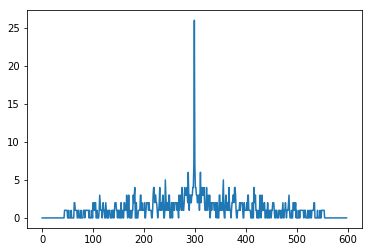

In [9]:
plt.plot(AutoCorrelation)
plt.show()

In [10]:
##########################
#Some PSTH stuff, trying
binSize = 20
binarySpikeTrain, PSTH, noOfBins = st.PSTH(spiketrain,binSize)

no of data points: 4000
array shape: (4000,)
PSTH :[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  2.  3.  0.  1.  0.  1.  0.  0.
  1.  1.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  1.  2.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


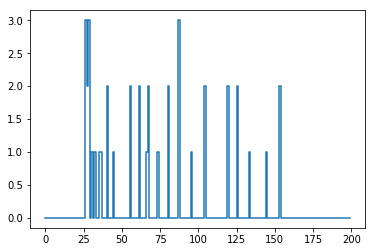

In [11]:
x = np.arange(noOfBins)
plt.step(x,PSTH)